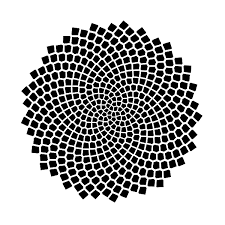

In [1]:
#Check the versions of the key python libraries
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas 
import pandas
print('pandas: %s' % pandas.__version__)
# statsmodel
import statsmodels
print('statsmodel: %s' % statsmodels.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)

scipy: 1.5.2
numpy: 1.19.2
matplotlib: 3.3.2
pandas: 1.2.3
statsmodel: 0.12.2
sklearn: 0.23.2


### Problem statement: 
 * In this lesson, we will use the Daily Female Births Dataset as an example. This dataset describes the number of daily female births in California in 1959. You can learn more about the dataset in Appendix A.4.
 * Place the dataset in your current working directory with the filename: daily-total-female-births.csv.

## Data preparation

In [2]:
# Load dataset using read_csv()
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import concat
import numpy
from statsmodels.graphics.gofplots import qqplot

from math import sqrt
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from random import random

from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
from random import randrange


# load data
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# Display the datatype after converting our dataframe to Series
print(type(series)) 
# Exploring Time Series Data / Peek at the Data
series.head(10) 

<class 'pandas.core.series.Series'>


Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
Name: Births, dtype: int64

Note the arguments to the read csv() function. We provide it a number of hints to ensure
the data is loaded as a Series.
* header=0:  We must specify the header information at row 0.
* parse dates=True:  We give the function a hint that data in the first column contains dates that need to be parsed.
* index col=0:  We hint that the first column contains the index information for the time series.
* squeeze=True:  We hint that we only have one data column and that we are interested in a Series and not a DataFrame.

In [3]:
# Dimensions of a time series / Number of Observations meaning one for each day of the year 1959
series.size

365

In [4]:
# Querying a dataset using a date-time index  - 
print(series['1959-01']) # To access all observsations in January 

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: Births, dtype: int64


Note: This type of index-based querying can help to prepare summary statistics and plots while exploring the dataset.

In [5]:
# Calculate Descriptive statistics
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Births, dtype: float64

## Feature Engineering
   * To re-framed Times Series data as a supervised learning dataset.
   * In the case of time series, there is no concept of input and output variables.
   * We will focus on univariate (one variable) time series dataset in this example.

## Data Visualization

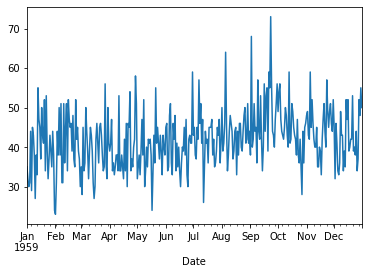

In [6]:
# Create a Line Plot
series.plot()
pyplot.show()

=> The line plot is quite dense.

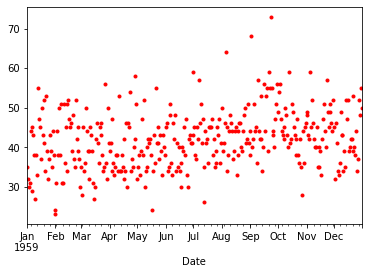

In [7]:
# Create a dot plot
series.plot(style='k.', c='r')
pyplot.show()

<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'Histogram '}>

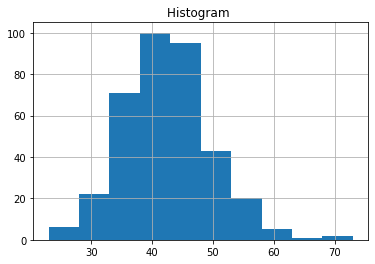

In [8]:
#Histogram and Density Plots
 # Create histogram plot
fig, ax = plt.subplots()
ax.set_title("Histogram ")
series.hist()
 # Create Density plot
#fig, ax = plt.subplots()
#ax.set_title("Density ")
#series.plot(kind='kde', c='r')

* With histogram, we get a better idea of the shape of the distribution of observation.

In [9]:
# correlation of lag=1
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = [ ' t ' , ' t+1 ' ]
result = dataframe.corr()
print(result)

             t       t+1 
 t     1.000000  0.217877
 t+1   0.217877  1.000000


* This is a bad confirmation for the plot above. It shows a weak negative  correlation (0.21)between the observation and the lag=1 value. Therefore the variables move in opposite directions as values change. The graph shows that one goes up and one goes down.

# Moving Average Smoothing

 * Moving average smoothing works and the expectations of time series data before
using it.
 * Use moving average smoothing for data preparation.
 * Use moving average smoothing for feature engineering.
 * Use moving average smoothing to make predictions.

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03    32.333333
1959-01-04    31.000000
1959-01-05    35.000000
1959-01-06    34.666667
1959-01-07    39.333333
1959-01-08    39.000000
1959-01-09    42.000000
1959-01-10    36.000000
Name: Births, dtype: float64


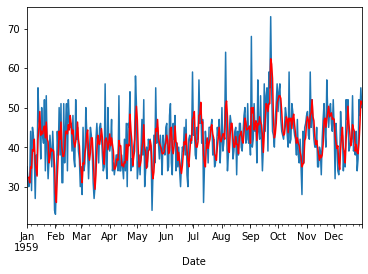

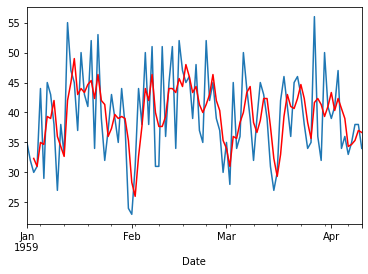

In [10]:
# Moving average smoothing as data preparation

# tail-rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))

# plot original and transformed dataset
series.plot()
rolling_mean.plot(color= 'red')
pyplot.show()

# zoomed plot original and transformed dataset
series[:100].plot()
rolling_mean[:100].plot(color='red' )
pyplot.show()

   * To get a better idea of the effect of the transform, we can zoom in and plot the first 100 observations - shown Graph 2.
   * Line plot of the dataset (blue) with a moving average (red).

In [11]:
# Moving average smoothing as feature engineering
df = DataFrame(series.values)
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = concat([means, lag1, df], axis=1)
dataframe.columns = [ ' mean ' , ' t ' , ' t+1 ' ]
print(dataframe.head(10))

       mean     t    t+1 
0        NaN   NaN     35
1        NaN  35.0     32
2        NaN  32.0     30
3        NaN  30.0     31
4  32.333333  31.0     44
5  31.000000  44.0     29
6  35.000000  29.0     45
7  34.666667  45.0     43
8  39.333333  43.0     38
9  39.000000  38.0     27


predicted=51.666667, expected=50.000000
Test RMSE: 7.834


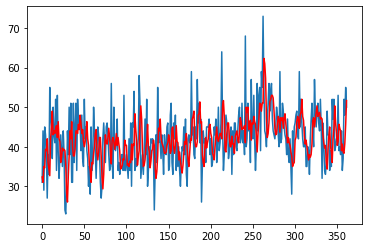

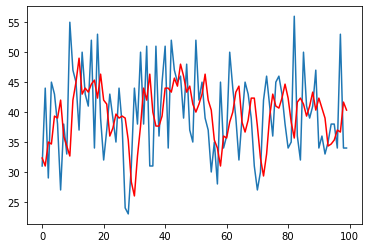

In [12]:
# Moving Average as Prediction & smoothing as a forecast model

# Prepare situation
X = series.values
window = 3 # Note the window width of 3 was chosen arbitrary and was not optimized.
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
#walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
print('predicted=%f, expected=%f' %(yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' %rmse)
#plot
pyplot.plot(test)
pyplot.plot(predictions, color= 'red' )
pyplot.show()
#zoom plot
pyplot.plot(test[:100])
pyplot.plot(predictions[:100], color= 'red' )
pyplot.show()

* Again, zooming in on the first 100 predictions gives an idea of the skill of the 3-day moving average predictions. Note the window width of 3 was not chosen arbitrary and was not optimized.

## Temporal Structure
 ###  White Noise Time Series

We can create a list of 1,000 random Gaussian
variables using the gauss() function from the random module 1 . We will draw variables from a
Gaussian distribution with a mean(μ) of 0.0 and a standard deviation(σ) of 1.0

In [13]:
# Seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(1000)]
series = Series(series)

In [14]:
series.describe()

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64

* We can see that μ=0.0 and σ=1.0

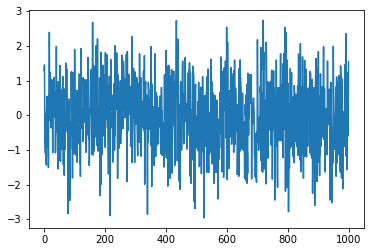

In [15]:
# line plot
series.plot()
pyplot.show()

   * We notice that the series is random. So we will nwxt create an histogram and confirm the distribution of is Gaussian. However We can see that it does appear that the series is random.

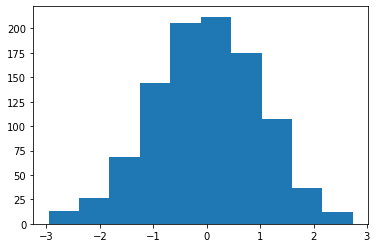

In [16]:
# Create histogram in order to obtain the Tell-Tale bel-curve shape
series.hist(grid=False)
pyplot.show()

 * Indeed, the histogram plot of the white noise series shows the tell-tale bell-curve shape.

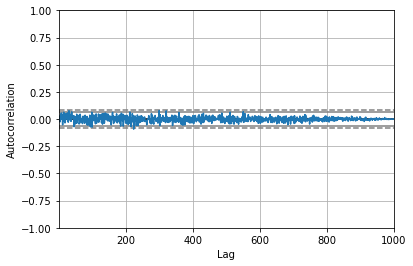

In [17]:
# Now have it! We can now create a correlogram plot of the White Noise series
autocorrelation_plot(series)
pyplot.show()

Indeed, how the correlogram does not show any correlation pattern. There are some spikes above 95% and 99% confidence level. However, lucky enough to get this result not because there is some correlation or cause and effect or statistical fluke.

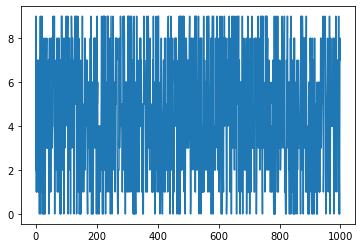

In [18]:
# Create and plot a random series
seed(1)
series = [randrange(10) for i in range(1000)]
pyplot.plot(series)
pyplot.show()


Plots the sequence of random numbers or White series which looks nothing like a time series. However this is not a Random Walk.

## Random Walk
y(t) = B0 + B1 × X(t − 1) + e(t)

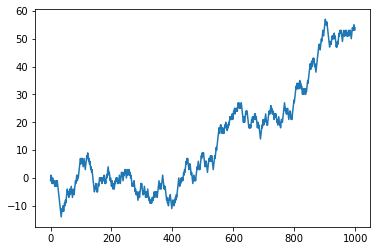

In [19]:
# Create and plot a random walk

seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
pyplot.plot(random_walk)
pyplot.show()

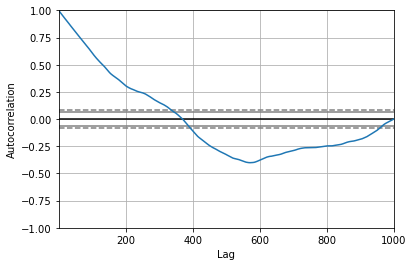

In [20]:
# Plot the autocorrelation of a random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
autocorrelation_plot(random_walk)
pyplot.show()

we generally see the expected trend, in this case across the first few
hundred lag observations.

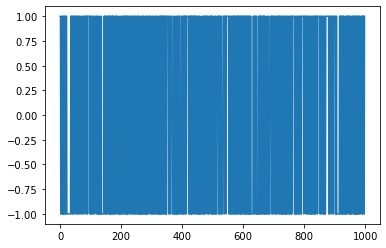

In [21]:
from matplotlib import pyplot
# create random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
# take difference
diff = list()
for i in range(1, len(random_walk)):
    value = random_walk[i] - random_walk[i - 1]
    diff.append(value)
# line plot
pyplot.plot(diff)
pyplot.show()

This difference graph also makes it clear that really we have no information to work with
here other than a series of random moves. There is no structure to learn. Now that the time series is stationary, we can recalculate the correlogram of the differenced series.

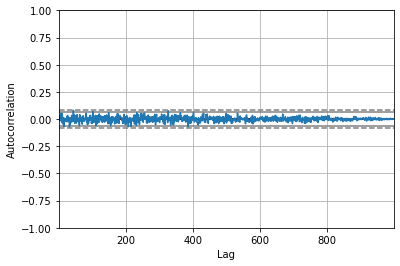

In [22]:
# Plot the autocorrelation of a differenced random walk

from pandas.plotting import autocorrelation_plot
# create random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
# take difference
diff = list()
for i in range(1, len(random_walk)):
    value = random_walk[i] - random_walk[i - 1]
    diff.append(value)
# line plot
autocorrelation_plot(diff)
pyplot.show()

All correlations are small, close to zero and below the 95% and 99% confidence levels

### Predicting a Random Walk

In [23]:
# Persistence forecasts for a random walk

###  Generate the ramdom walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
#Prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]

# Persistence 
predictions = list()
history = train[-1]
for i in range(len(test)):
    yhat = history
    predictions.append(yhat)
    history = test[i]
rmse = sqrt(mean_squared_error(test, predictions))
print('Persistence RMSE: %.3f' %rmse)

# Random prediction
predictions = list()
history = train[-1]
for i in range(len(test)):
    yhat = history + (-1 if random() < 0.5 else 1)
    predictions.append(yhat)
    history = test[i]
rmse = sqrt(mean_squared_error(test, predictions))
print('Random RMSE: %.3f' % rmse)

Persistence RMSE: 1.000
Random RMSE: 1.328


* Indeed we see that the algorithm results in a worse performance
  than the persistence method, with a RMSE of 1.328. 
  Therefore the naive forecast(persistence), is the best prediction we
  can make for a random walk time series.

## Stationarity in Time Series  and Forecasting

- Above histogram plot of the dataset has shown that the We clearly see the bell curve-like shape of the Gaussian distribution, perhaps with a longer right tail.
- Therefore we can split the time series into 2 contiguous sequences. And then calculate the mean and variance of each group of number and compare the values.

In [24]:
# calculate statistics of partitioned time series data
from pandas import read_csv

series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True,squeeze=True)
X = series.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


- The results shows that the mean and variance values are different, but in the
same ball-park.

## Augmented Dickey-Fuller test

In [25]:
# calculate stationarity test of time series data
from statsmodels.tsa.stattools import adfuller

X = series.values
result = adfuller(X)
print( ' ADF Statistic: %f ' % result[0])
print( ' p-value: %f ' % result[1])
print( ' Critical Values: ' )
for key, value in result[4].items():
    print('\t%s: %.3f ' % (key, value))

 ADF Statistic: -4.808291 
 p-value: 0.000052 
 Critical Values: 
	1%: -3.449 
	5%: -2.870 
	10%: -2.571 


Statistic value of -4 demontrates that we are to reject the null hypothesis, we have a stationary dataset. We can see that our statistic value of -4 is less than the value of -3.449 at 1%.
Also, we can reject the null hypothesis with a significance level of less than 1%. Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have
time-dependent structure.

 Observations: 365 
 Training Observations: 255 
 Testing Observations: 110 


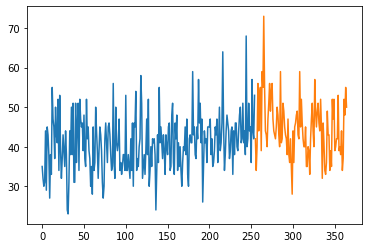

In [26]:
# Plot train-test split of time series data
X = series.values
train_size = int(len(X) * 0.7)
train, test = X[0:train_size], X[train_size:len(X)]
print( ' Observations: %d ' % (len(X)))
print( ' Training Observations: %d ' % (len(train)))
print( ' Testing Observations: %d ' % (len(test)))
pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test])
pyplot.show()

- Plots the training dataset as blue and the test dataset as orange.

### Walk Forward Validation

In [27]:
# Walk forward evaluation model for time series data
X = series.values
n_train = 500
n_records = len(X)
for i in range(n_train, n_records):
    train, test = X[0:i], X[i:i+1]
print('train=%d, test=%d' %(len(train), len(test)))

train=255, test=110


### Forecast Error (or Residual Forecast Error)
forecast_error = expected value − predicted value
- demonstrates how the forecast error can be calculated for a series of 5 predictions compared to 5 expected values.

In [28]:
#Forecast Error (or Residual Forecast Error)
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
print('Forecast Errors: %s' % forecast_errors)

Forecast Errors: [-0.2, 0.09999999999999998, -0.1, -0.09999999999999998, -0.2]


In [29]:
# calculate mean forecast error
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
bias = sum(forecast_errors) * 1.0/len(expected)
print( ' Bias: %f ' % bias)

 Bias: -0.100000 


* In this case the result is negative, meaning that we have over forecast.

In [30]:
# calculate mean absolute error
from sklearn.metrics import mean_absolute_error
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
mae = mean_absolute_error(expected, predictions)
print('MAE: %f' % mae)

MAE: 0.140000


In [31]:
# calculate mean squared error
from sklearn.metrics import mean_squared_error
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
mse = mean_squared_error(expected, predictions)
print('MSE: %f' % mse)

MSE: 0.022000


In [32]:
# calculate root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f ' % rmse)

RMSE: 0.148324 


## Visualize Residual Forecast Errors
       residual error = expected − forecast
           
       Or, more succinctly and using standard terms as:
                     e = y − yhat
 
 #### Persistence Forecast Model

In [33]:
# Create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
#Split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
#Persistence model 
predictions = [x for x in test_X]
#Calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
print(residuals.head())

      0
0   9.0
1 -10.0
2   3.0
3  -6.0
4  30.0


We have the first five forecast errors for the persistence forecast on our dataset.

### Residual Line Plot

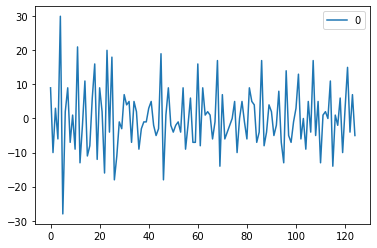

In [34]:
# Line plot of the forecast residual errors
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t','t+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
# plot residuals
residuals.plot()
pyplot.show()

* The plot hows a seemingly random of the residual time series. If we did see trend, seasonal or cyclic structure,  we could go back to our model and attempt to capture those elements directly

In [35]:
# Summary statistics of residual errors
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t' , 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)


In [36]:
# summary statistics
print(residuals.describe())

                0
count  125.000000
mean     0.064000
std      9.187776
min    -28.000000
25%     -6.000000
50%     -1.000000
75%      5.000000
max     30.000000


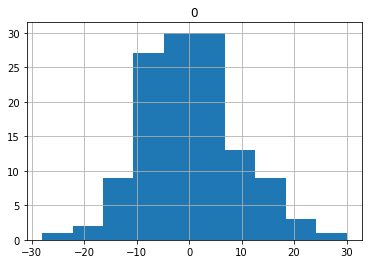

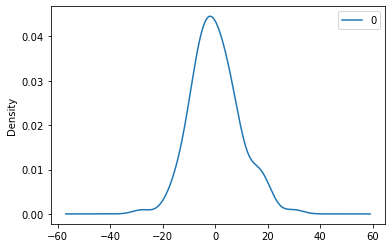

In [37]:
#Density Plots of residual errors
## create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = [ 't' , 't+1' ]
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
# histogram plot
residuals.hist()
pyplot.show()
# density plot
residuals.plot(kind= 'kde' )
pyplot.show()

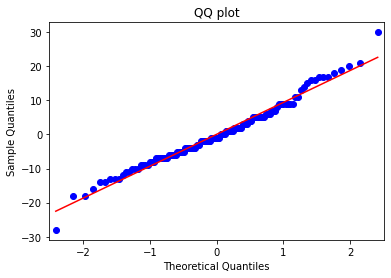

In [38]:
# QQ plot of residual errors

###c reate lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = [ 't' , 't+1' ]
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = numpy.array(residuals)
qqplot(residuals, line= 'r' )
pyplot.title('QQ plot')
pyplot.show()

We see that Q-Q plot that the distribution is seemingly normal with a few bumps and outliers.
Now we can check for correlations between the errors over time.

### Residual Autocorrelation Plot

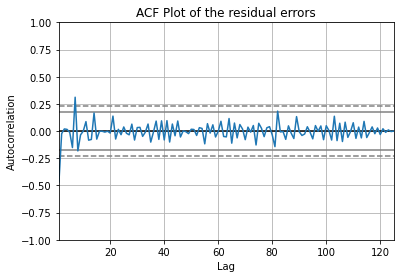

In [39]:
# Autoregression plot of residual errors
from pandas.plotting import autocorrelation_plot

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = [ ' t ' , ' t+1 ' ]
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
autocorrelation_plot(residuals)
pyplot.title('ACF Plot of the residual errors')
pyplot.show()


### Moving Average Models for Forecasting

In [40]:
# Calculate residual errors for a persistence forecast model
from sklearn.metrics import mean_squared_error
from math import sqrt

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t' , 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# skill of persistence model
rmse = sqrt(mean_squared_error(test_y, predictions))
print( ' Test RMSE: %.3f ' % rmse)
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
print(residuals.head())

 Test RMSE: 9.151 
      0
0   9.0
1 -10.0
2   3.0
3  -6.0
4  30.0


In [41]:
# Autoregressive model of residual errors
from statsmodels.tsa.ar_model import AR

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t' , 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
print( ' Lag=%d, Coef=%s ' % (window, coef))

 Lag=15, Coef=[ 0.10120699 -0.84940615 -0.77783609 -0.73345006 -0.68902061 -0.59270551
 -0.5376728  -0.42553356 -0.24861246 -0.19972102 -0.15954013 -0.11045476
 -0.14045572 -0.13299964 -0.12515801 -0.03615774] 


/home/jopapy19/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWa

predicted error=1.155523, expected error=9.000000
predicted error=-7.108809, expected error=-10.000000
predicted error=3.007486, expected error=3.000000
predicted error=-0.756446, expected error=-6.000000
predicted error=5.511163, expected error=30.000000
predicted error=-19.991264, expected error=-28.000000
predicted error=4.842429, expected error=2.000000
predicted error=3.050883, expected error=9.000000
predicted error=-5.141585, expected error=-7.000000
predicted error=1.161119, expected error=1.000000
predicted error=-0.241928, expected error=-9.000000
predicted error=9.159826, expected error=21.000000
predicted error=-7.117974, expected error=-13.000000
predicted error=1.182992, expected error=-2.000000
predicted error=2.769363, expected error=11.000000
predicted error=-4.959337, expected error=-11.000000
predicted error=2.566233, expected error=-8.000000
predicted error=9.084498, expected error=6.000000
predicted error=3.020899, expected error=16.000000
predicted error=-6.542098

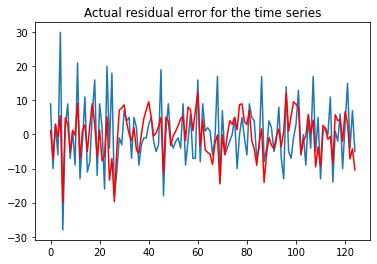

In [42]:
# Forecast residual forecast error
from statsmodels.tsa.ar_model import AR
from matplotlib import pyplot

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = [ 't' , 't+1' ]
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
expected_error = list()
for t in range(len(test_y)):
    # Persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    expected_error.append(error)
    # Predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    predictions.append(pred_error)
    history.append(error)
    print('predicted error=%f, expected error=%f' % (pred_error, error))
# Plot predicted error
pyplot.plot(expected_error)
pyplot.plot(predictions, color='red')
pyplot.title('Actual residual error for the time series')
pyplot.show()

Note:  Above line plot of exped residual error(blue) and forecast residual error(red) on the dataset. However, now we know how to model residual error. Next we will loook at how we can correct forcasts and improving model skill.

### Correct Predictions with a Model of Residuals

 * improved forecast = forecast + estimated error

predicted=43.155523, expected=51.000000
predicted=43.891191, expected=41.000000
predicted=44.007486, expected=44.000000
predicted=43.243554, expected=38.000000
predicted=43.511163, expected=68.000000
predicted=48.008736, expected=40.000000
predicted=44.842429, expected=42.000000
predicted=45.050883, expected=51.000000
predicted=45.858415, expected=44.000000
predicted=45.161119, expected=45.000000
predicted=44.758072, expected=36.000000
predicted=45.159826, expected=57.000000
predicted=49.882026, expected=44.000000
predicted=45.182992, expected=42.000000
predicted=44.769363, expected=53.000000
predicted=48.040663, expected=42.000000
predicted=44.566233, expected=34.000000
predicted=43.084498, expected=40.000000
predicted=43.020899, expected=56.000000
predicted=49.457902, expected=44.000000
predicted=45.328116, expected=53.000000
predicted=45.225588, expected=55.000000
predicted=48.705924, expected=39.000000
predicted=44.166344, expected=59.000000
predicted=45.621871, expected=55.000000


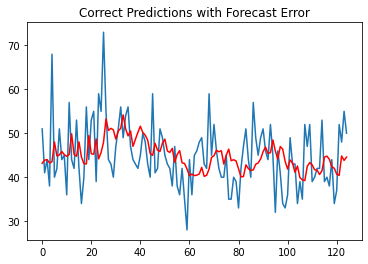

In [43]:
# Correct forecasts with a model of forecast residual errors
from statsmodels.tsa.ar_model import AR
# from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t' ,'t+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    # correct the prediction
    yhat = yhat + pred_error
    predictions.append(yhat)
    history.append(error)
    print('predicted=%f, expected=%f' % (yhat, test_y[t]))
# error
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predicted error
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.title('Correct Predictions with Forecast Error')
pyplot.show()

* The RMSE of the corrected forecasts is calculated to be 7.499 births per day, which is much better than the score of 9.151 for the persistence model alone. However we observe that the persistence model has been corrected back to a time series which looks like a Moving Average.

## Grid Search ARIMA Model Hyperparameters

In [44]:
# Grid search ARIMA parameters for time series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print( ' ARIMA%s RMSE=%.3f ' % (order,rmse))
                except:
                    continue
    print(' Best ARIMA%s RMSE=%.3f ' % (best_cfg, best_score))

# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

 ARIMA(0, 0, 0) RMSE=8.189 
 ARIMA(0, 0, 1) RMSE=7.884 
 ARIMA(0, 0, 2) RMSE=7.771 
 ARIMA(0, 1, 0) RMSE=9.167 
 ARIMA(0, 1, 1) RMSE=7.527 
 ARIMA(0, 1, 2) RMSE=7.435 
 ARIMA(0, 2, 0) RMSE=15.698 
 ARIMA(0, 2, 1) RMSE=9.201 
 ARIMA(0, 2, 2) RMSE=7.520 
 ARIMA(1, 0, 0) RMSE=7.802 
 ARIMA(1, 0, 1) RMSE=7.554 
 ARIMA(1, 1, 0) RMSE=8.120 
 ARIMA(1, 1, 1) RMSE=7.425 
 ARIMA(1, 1, 2) RMSE=7.429 
 ARIMA(1, 2, 0) RMSE=11.990 
 ARIMA(2, 0, 0) RMSE=7.697 
 ARIMA(2, 0, 1) RMSE=7.421 
 ARIMA(2, 0, 2) RMSE=7.481 
 ARIMA(2, 1, 0) RMSE=7.713 
 ARIMA(2, 1, 1) RMSE=7.417 
 ARIMA(2, 1, 2) RMSE=7.429 
 ARIMA(2, 2, 0) RMSE=10.373 
 ARIMA(4, 0, 0) RMSE=7.693 
 ARIMA(4, 0, 1) RMSE=7.825 
 ARIMA(4, 0, 2) RMSE=7.458 
 ARIMA(4, 1, 0) RMSE=7.578 
 ARIMA(4, 1, 1) RMSE=7.474 
 ARIMA(4, 1, 2) RMSE=7.455 
 ARIMA(4, 2, 0) RMSE=8.956 
 ARIMA(6, 0, 0) RMSE=7.666 
 ARIMA(6, 0, 1) RMSE=7.711 
 ARIMA(6, 1, 0) RMSE=7.293 
 ARIMA(6, 1, 1) RMSE=7.569 
 ARIMA(6, 1, 2) RMSE=7.469 
 ARIMA(6, 2, 0) RMSE=8.352 
 ARIMA(8, 0, 0) R

* Output of grid searching ARIMA configuration

## Save Models and Make Predictions
1. Model Selection. This is where you choose a model and gather evidence and support to defend the decision.
2. Model Finalization. The chosen model is trained on all available data and saved to file for later use.
3. Forecasting. The saved model is loaded and used to make a forecast.
4. Model Update. Elements of the model are updated in the presence of new observations.

#### Select Time Series Forecast Model
         value(t) = obs(t) − obs(t − 1) 
* The AR(6) model is trained on 66% of the historical data

Test RMSE: 7.259


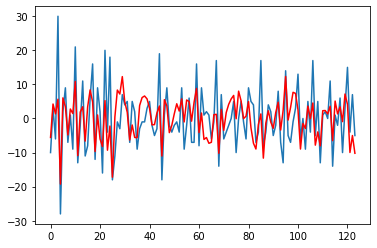

In [45]:
# fit and evaluate an AR model
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
import numpy
from math import sqrt

# Create a difference transform of the dataset
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return numpy.array(diff)

# Make a prediction give regression coefficients and lag obs
def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
    return yhat

# split dataset
X = difference(series.values)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]
# train autoregression
model = AR(train)
model_fit = model.fit(maxlag=6, disp=False)
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
    yhat = predict(coef, history)
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# Plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

* Root Mean Squared(RMSE) of the predictions is about 7 births on average.
* Line plot of expected values(blue) and AR model predictions(red) on the dataset. This is not the very best model we could develop on this problem.

## Finalize and Save Time Series Forecast Model

In [46]:
# fit an AR model and save the whole model to file
from statsmodels.tsa.ar_model import AR

# create a difference transform of the dataset
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return numpy.array(diff)

X = difference(series.values)
# fit model
model = AR(X)
model_fit = model.fit(maxlag=6, disp=False)
# save model to file
model_fit.save('ar_model.pkl')
# save the differenced dataset
numpy.save('ar_data.npy', X)
# save the last ob
numpy.save('ar_obs.npy', [series.values[-1]])

In [47]:
# load the AR model from file
from statsmodels.tsa.ar_model import ARResults
import numpy

loaded = ARResults.load('ar_model.pkl')
print(loaded.params)
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
print(last_ob)

[ 0.12129822 -0.75275857 -0.612367   -0.51097172 -0.4176669  -0.32116469
 -0.23412997]
[50]


In [48]:
# fit an AR model and manually save coefficients to file

from statsmodels.tsa.ar_model import AR
import numpy
# create a difference transform of the dataset
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return numpy.array(diff)

X = difference(series.values)
# fit model
window_size = 6
model = AR(X)
model_fit = model.fit(maxlag=window_size, disp=False)
# save coefficients
coef = model_fit.params
numpy.save('man_model.npy', coef)
# save lag
lag = X[-window_size:]
numpy.save('man_data.npy', lag)
# save the last ob
numpy.save('man_obs.npy', [series.values[-1]])

In [49]:
# load the manually saved model from file
import numpy
coef = numpy.load('man_model.npy')
print(coef)
lag = numpy.load('man_data.npy')
print(lag)
last_ob = numpy.load('man_obs.npy')
print(last_ob)

[ 0.12129822 -0.75275857 -0.612367   -0.51097172 -0.4176669  -0.32116469
 -0.23412997]
[-10   3  15  -4   7  -5]
[50]


### Make a Time Series Forecast

In [50]:
# load AR model from file and make a one-step prediction
from statsmodels.tsa.ar_model import ARResults
import numpy
# load model
model = ARResults.load('ar_model.pkl')
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
# make prediction
predictions = model.predict(start=len(data), end=len(data))
# transform prediction
yhat = predictions[0] + last_ob[0]
print('Prediction: %f' % yhat)

Prediction: 46.755211


In [51]:
# load a coefficients and from file and make a manual prediction
import numpy
def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
    return yhat
# load model
coef = numpy.load('man_model.npy')
lag = numpy.load('man_data.npy')
last_ob = numpy.load('man_obs.npy' )
# make prediction
prediction = predict(coef, lag)
# transform prediction
yhat = prediction + last_ob[0]
print( ' Prediction: %f ' % yhat)

 Prediction: 46.755211 


* We achieve the same prediction.

## Update Forecast Model

In [52]:
# update the data for the AR model with a new obs
import numpy
# get real observation
observation = 48
# load the saved data
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
# update and save differenced observation
diffed = observation - last_ob[0]
data = numpy.append(data, [diffed], axis=0)
numpy.save('ar_data.npy', data)
# update and save real observation
last_ob[0] = observation
numpy.save('ar_obs.npy', last_ob)

* Update the differenced data and last observation for the AR model.

In [53]:
# Update the data for the manual model with a new obs
import numpy
# get real observation
observation = 48
# update and save differenced observation
lag = numpy.load('man_data.npy')
last_ob = numpy.load('man_obs.npy')
diffed = observation - last_ob[0]
lag = numpy.append(lag[1:], [diffed], axis=0)
numpy.save('man_data.npy', lag)
# update and save real observation
last_ob[0] = observation
numpy.save('man_obs.npy', last_ob)

## Forecast Confidence Intervals

In [54]:
# summarize the confidence interval on an ARIMA forecast
from statsmodels.tsa.arima_model import ARIMA

# split into train and test sets
X = series.values
X = X.astype('float32')
size = len(X) - 1
train, test = X[0:size], X[size:]
# fit an ARIMA model
model = ARIMA(train, order=(5,1,1))
model_fit = model.fit(disp=False)
# forecast
forecast, stderr, conf = model_fit.forecast()
# summarize forecast and confidence intervals
print( ' Expected: %.3f ' % test[0])
print( ' Forecast: %.3f ' % forecast)
print( ' Standard Error: %.3f ' % stderr)
print( ' 95%% Confidence Interval: %.3f to %.3f ' % (conf[0][0], conf[0][1]))

 Expected: 50.000 
 Forecast: 45.878 
 Standard Error: 6.996 
 95% Confidence Interval: 32.167 to 59.590 


### Interpreting the Confidence Interval

In [55]:
# summarize multiple confidence intervals on an ARIMA forecast

from statsmodels.tsa.arima_model import ARIMA

# split data into train and test set
X = series.values
X = X.astype('float32')
size = len(X) - 1
train, test = X[0:size], X[size:]
# fit an ARIMA model
model = ARIMA(train, order=(5,1,1))
model_fit = model.fit(disp=False)
# summarize confidence intervals
intervals = [0.2, 0.1, 0.05, 0.01]
for a in intervals:
    forecast, stderr, conf = model_fit.forecast(alpha=a)
    print(' %.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, conf[0][0], conf[0][1]))

 80.0% Confidence Interval: 45.878 between 36.913 and 54.844
 90.0% Confidence Interval: 45.878 between 34.371 and 57.386
 95.0% Confidence Interval: 45.878 between 32.167 and 59.590
 99.0% Confidence Interval: 45.878 between 27.858 and 63.898


### Plotting the Confidence Interval

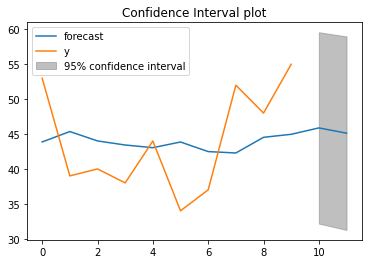

In [56]:
# Plot the confidence intervals for an ARIMA forecast
# split into train and test sets
X = series.values
X = X.astype('float32')
size = len(X) - 1
train, test = X[0:size], X[size:]
# fit an ARIMA model
model = ARIMA(train, order=(5,1,1))
model_fit = model.fit(disp=False)
# plot some history and the forecast with confidence intervals
model_fit.plot_predict(len(train)-10, len(train)+1)
pyplot.legend(loc='upper left')
pyplot.title('Confidence Interval plot')
pyplot.show()

* Line plot of expected (green) and forecast (blue) with a 95% confidence interval(orange)

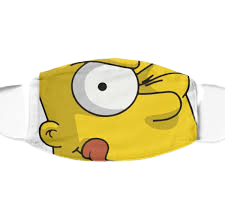